Importere alle biblioteker som jeg har tengt å bruke.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Initialisere variabler som skal benyttes senere

In [2]:
tid = []
ems = []

Lager en funksjon som plotter en plot, slik jeg vil den skal plottes, så sparer jeg tid hver gang jeg skal plotte noe.

In [3]:
def do_plot(x_label, y_label, title):
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    legend = plt.legend(loc='upper right', shadow=True)
    plt.show()

Les inn data og lagre i variabler

In [4]:
dtf = open("induksjon_egen_23042024.csv", "r")
lines = dtf.readlines()
dtf.close()


Finne antall forsøk, og så finne hvor mange variabler hvert forsøk har. Slik det er mulig å gjøre dette uten å vite nøyaktig hvor mange forsøk det er, eller hvor mange variabler i hvert forsøk.

In [5]:
lables = lines[0].strip().split(",")
sublables = lines[1].strip().split(",")
lables = list(dict.fromkeys(lables))
valsPerRun = int(len(sublables)/len(lables))
voltageIndex = sublables.index("Voltage (V)")

#legge til antall lister for antall forsøk
for i in range(len(lables)):
    ems.append([])

Legger så inn hver variabel i den respektive listen til "ems" og "tid" skal være lik.

In [6]:
for row in lines[2:]:
    row = row.strip().split(",")
    tid.append(float(row[1]))
    for i in range(len(lables)):
        ems[i].append(float(row[i*valsPerRun + voltageIndex])*1e5)

Plot dataen for hver verdi i "ems".

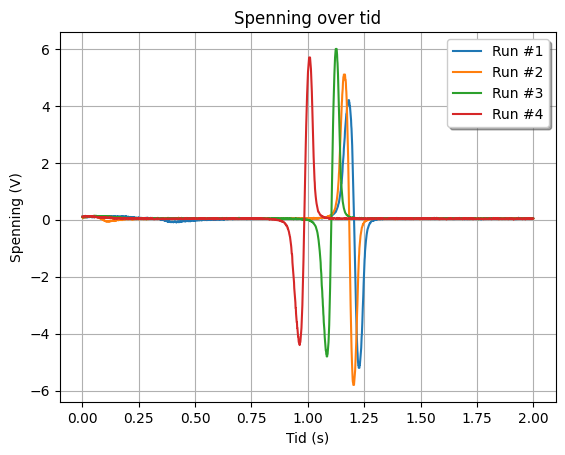

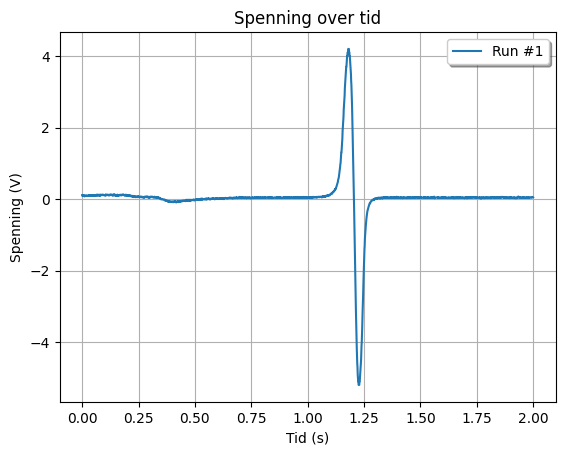

In [7]:
for i in range(len(ems)):
    plt.plot(tid, ems[i], label=lables[i])

do_plot("Tid (s)", "Spenning (V)", "Spenning over tid")

plt.plot(tid, ems[0], label=lables[0])
do_plot("Tid (s)", "Spenning (V)", "Spenning over tid")

Så skal jeg gjennomføre en integral på hver av de 4 forsøkene, og med dette finner jeg totale fluksen (Vs) for grafene:

Voltsekunder:  [0.45238132999999975, 0.4461483199999998, 0.4560899000000011, 0.4486856999999998]


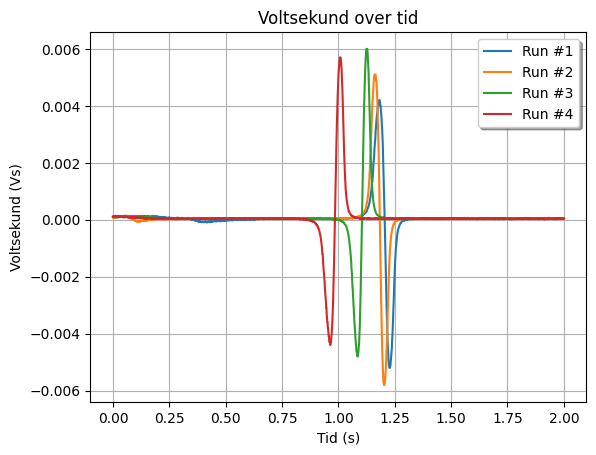

In [8]:
voltsekunder = []
voltsekund = []
for i in range(len(ems)):
    voltsekunder.append(0)
    voltsekund.append([])
    for j in range(len(ems[i])):
        voltsekunder[i] += abs(ems[i][j] * (0.001))
        voltsekund[i].append((ems[i][j] * (0.001)))
    
print("Voltsekunder: ", voltsekunder)
for i in range(len(voltsekund)):
    plt.plot(tid, voltsekund[i], label=lables[i])
do_plot("Tid (s)", "Voltsekund (Vs)", "Voltsekund over tid")

Her gjør jeg derivasjon av dataene, og dette gir meg endringen av spenning over tid. Med dette kan jeg så finne monotoni egenskapene.

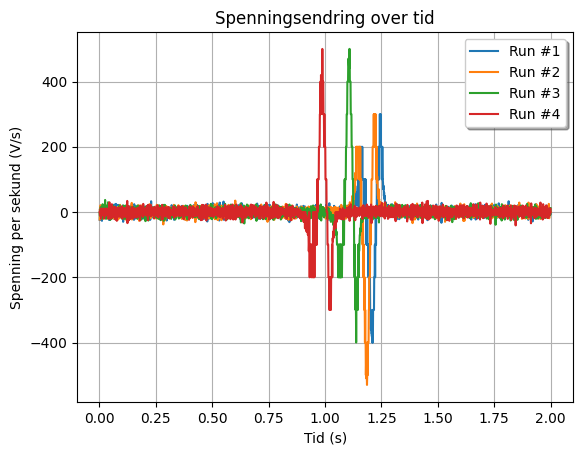

In [9]:
#Derivasjon av dataen
deriverte = []
for i in range(len(ems)):
    deriverte.append([])
    for j in range(len(ems[i])-1):
        deriverte[i].append((ems[i][j+1] - ems[i][j])/(tid[j+1]-tid[j]))
     
for i in range(len(deriverte)):
    plt.plot(tid[1:], deriverte[i], label=lables[i])
do_plot("Tid (s)", "Spenning per sekund (V/s)", "Spenningsendring over tid")

Markdown